## 🚨 Warning 🚨

This Notebook builds on 1_Introduction.

You have to run that Notebook (if you didn't already) and mount your Google Drive to this Notebook via
```python
from google.colab import drive
drive.mount('/content/drive')
```
then you are ready to go!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nifti Data

Nifti (Neuroimaging Informatics Technology Initiative) is the standard file format (`.nii` or `.nii.gz`) to store medical imaging data. It originates from DICOM data which is the output format from medical imaging

It holds:

- 3D/4D data array, containing 3D pixels called **voxels**
- coordinate system (affine)
- additional infos (header)


## 1. Reading Niftis
[Nibabel](https://github.com/nipy/nibabel) is one of the most popular python libraries for loading Nifti files among [AntsPy](https://github.com/ANTsX/ANTsPy) and [SimpleITK](https://github.com/SimpleITK/SimpleITK).

Loading a Nifti can easily be done via

```python
import nibabel as nib

img = nib.load('drive/MyDrive/openneuro/ds000001/sub-01/anat/sub-01_T1w.nii.gz')
```
and the data array within the Nifti can be loaded via
```python
x = img.get_fdata()
```

**Task 1.1:** Find out the shape and dtype of the data array


In [2]:
import nibabel as nib

img = nib.load('drive/MyDrive/openneuro/ds000001/sub-01/anat/sub-01_T1w.nii.gz')
x = img.get_fdata()
print(x.shape, x.dtype)

(160, 192, 192) float64


**Task 1.2:** Print the affine and the header of the Nifti image (use the infos from the [Nibabel doc](https://nipy.org/nibabel/nifti_images.html))

In [3]:
print(img.affine)
print(img.header)

[[   1.            0.            0.          -83.        ]
 [   0.            1.33333302    0.         -125.        ]
 [   0.            0.            1.33333302 -136.        ]
 [   0.            0.            0.            1.        ]]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 160 192 192   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.       1.       1.333333 1.333333 2.3      0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax

## Exercise

1. Plot the middle slice of the data array (Hint: `cmap='gray'` to make it less ugly)

(np.float64(-0.5), np.float64(191.5), np.float64(191.5), np.float64(-0.5))

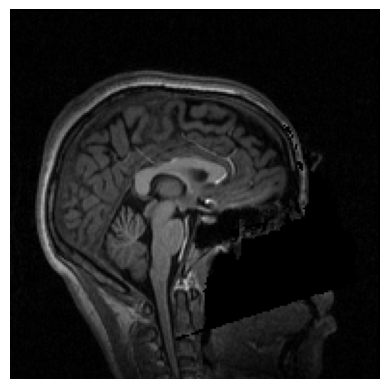

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.rot90(x[80]), cmap='gray')
plt.axis('off')

2. Plot three middle slices - one for each dimension - and plot them side by side

(np.float64(-0.5), np.float64(159.5), np.float64(191.5), np.float64(-0.5))

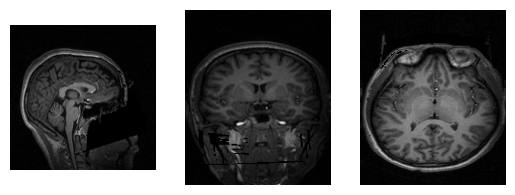

In [5]:
f, axs = plt.subplots(1, 3)
axs[0].imshow(np.rot90(x[80]), cmap='gray')
axs[0].axis('off')
axs[1].imshow(np.rot90(x[:, 96]), cmap='gray')
axs[1].axis('off')
axs[2].imshow(np.rot90(x[:, :, 96]), cmap='gray')
axs[2].axis('off')

3. Write it as a function which takes a filepath and returns a matplotlib Figure containing the plot from 2.

In [6]:
def plot_nifti(filepath, cmap='gray'):
  img = nib.load(filepath)
  x = img.get_fdata()
  f, axs = plt.subplots(1, 3)
  axs[0].imshow(np.rot90(x[80]), cmap=cmap)
  axs[1].imshow(np.rot90(x[:, 96]), cmap=cmap)
  axs[2].imshow(np.rot90(x[:, :, 96]), cmap=cmap)
  axs[0].axis('off')
  axs[1].axis('off')
  axs[2].axis('off')
  return f

4. For each "sub-XY_T1w.nii.gz" file in the ds000001-dataset apply the function and save the Figure in a new folder on your Google Drive

In [7]:
import glob
from pathlib import Path
PATH = '/content/drive/MyDrive/openneuro'

figure_path = f'{PATH}/nifti_figures'
Path(figure_path).mkdir(exist_ok=True)
for fpath in glob.glob(f'{PATH}/ds000001/*/anat/*_T1w.nii.gz'):
  figure = plot_nifti(fpath)
  fstem = Path(fpath).name[:-7]
  figure.savefig(f'{figure_path}/{fstem}.png')
  plt.close()

## 2. Modifiying Niftis

To modify the image data, first the Nifti must be loaded:

```python
import nibabel as nib

img = nib.load('drive/MyDrive/openneuro/ds000001/sub-01/anat/sub-01_T1w.nii.gz')
x = img.get_fdata()
```
Since the data array `x` is a NumPy array, modifications are straightforward:
```python
x[:80, :, :] = 0
```
Using the affine and header from the original we **create the new Nifti** via
```python
img_new = nib.Nifti1Image(x, img.affine, img.header)
```
and **save** it
```python
img_new.to_filename('sub-01_T1w_half.nii.gz')
```

**Task 2.1:** Run the above code and use the [Papaya Viewer](https://www.fmrib.ox.ac.uk/ukbiobank/group_means/index.html) to display the "sub-01_T1w_half.nii.gz".

In [8]:
import nibabel as nib

img = nib.load('drive/MyDrive/openneuro/ds000001/sub-01/anat/sub-01_T1w.nii.gz')
x = img.get_fdata()
x[:80, :, :] = 0
img_new = nib.Nifti1Image(x, img.affine, img.header)
img_new .to_filename('sub-01_T1w_half.nii.gz')

**Task 2.2:** Create "sub-01_T1w_clipped.nii.gz" in which all voxels from the original larger than 300 are set to 300.

In [9]:
x = img.get_fdata()
x[x > 300] = 300
img_clipped = nib.Nifti1Image(x, img.affine, img.header)
img_clipped .to_filename('sub-01_T1w_clipped.nii.gz')

**Task 2.3:** Create "sphere.nii.gz" where the data array is created with the following function

```python
import numpy as np

def sphere_array(shape=(160, 192, 192), radius=10):
  x, y, z = np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2])
  x, y, z = np.meshgrid(x, y, z, indexing='ij')
  c = np.array(shape) // 2
  sphere_mask = ((x - c[0])**2 + (y - c[1])**2 + (z - c[2])**2) < radius**2
  array = np.zeros(shape)
  array[sphere_mask] = 100
  return array
```

In [10]:
import numpy as np

def sphere_array(shape=(160, 192, 192), radius=50):
  x, y, z = np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2])
  x, y, z = np.meshgrid(x, y, z, indexing='ij')
  center = np.array(shape) / 2
  center_distance = (x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2
  center_distance[center_distance > radius] = 0
  return center_distance

x_sphere = sphere_array()
img_sphere = nib.Nifti1Image(x_sphere, affine=np.eye(4))
img_sphere.to_filename('sphere.nii.gz')

### Pitfall: Nifti Orientation

The data arrays inside of Niftis are not fixed to any orientation.

~90% of Niftis are oriented in the [RAS orientation](https://nipy.org/nibabel/image_orientation.html).

In the remaining cases the data arrays (+ the affines) dimensions are either
- permuted and/or
- inverted

resulting in 47 possible orientations besides the RAS orientation.

Lets have a look at such a pitfall Nifti where the axial dimension is inverted:


In [11]:
#@title Creating pitfall_nifti.nii.gz 😎
import nibabel as nib

img = nib.load('drive/MyDrive/openneuro/ds000001/sub-10/anat/sub-10_T1w.nii.gz')
orientation = np.array([[0, 1],
                        [1, 1],
                        [2, -1]])  # flipped last (axial) dimension
img_reoriented = img.as_reoriented(orientation)
img_reoriented.to_filename('pitfall_nifti.nii.gz')

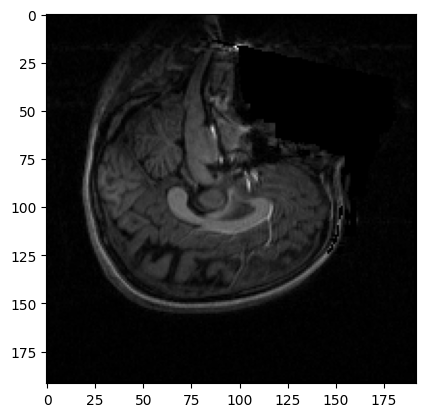

In [12]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

img = nib.load('pitfall_nifti.nii.gz')
x = img.get_fdata()
plt.imshow(np.rot90(x[80]), cmap='gray');

#### Avoid orientation pitfall

To **asure that each Nifti is in the RAS orientation you should use `nib.as_closest_canonical`**

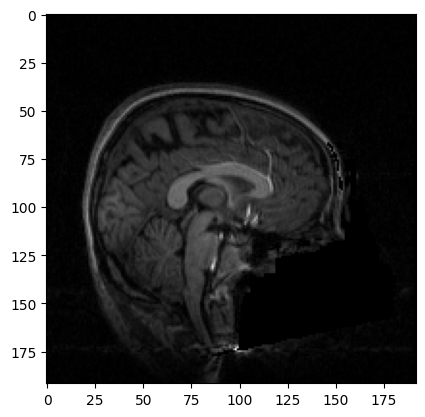

In [13]:
img = nib.load('pitfall_nifti.nii.gz')
img = nib.as_closest_canonical(img)
x = img.get_fdata()
plt.imshow(np.rot90(x[80]), cmap='gray');

## `niftiview` Exercise
![niftiview_logo_transparent_small](https://repository-images.githubusercontent.com/875620357/02caf846-cb7c-402d-a598-39f6ea64745e)

[`niftiview`](https://github.com/codingfisch/niftiview) simplifies the visualization of Niftis **a lot** (see [examples](https://github.com/codingfisch/niftiview/blob/main/examples/1_image.ipynb))!

*No worries, it was still worth it to struggle with matplotlib to learn stuff*

Let's redo the previous exerise using `niftiview`!

0. Install niftiview package

In [14]:
!pip install niftiview

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.9/958.9 kB 51.0 MB/s eta 0:00:00


1. Plot the middle slice of `sub-01_T1w.nii.gz`

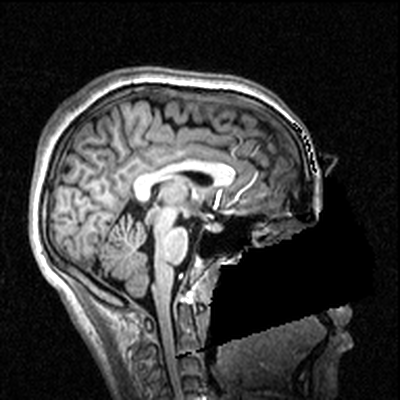

In [19]:
from niftiview import NiftiImage

nii = NiftiImage('drive/MyDrive/openneuro/ds000001/sub-01/anat/sub-01_T1w.nii.gz')
# get_image plots the slice(s) in the isocenter
# see: https://nipy.org/nibabel/coordinate_systems.html
nii.get_image(layout='sagittal')  # layout='s' would also work

2. Plot three middle slices - one for each dimension - and plot them side by side

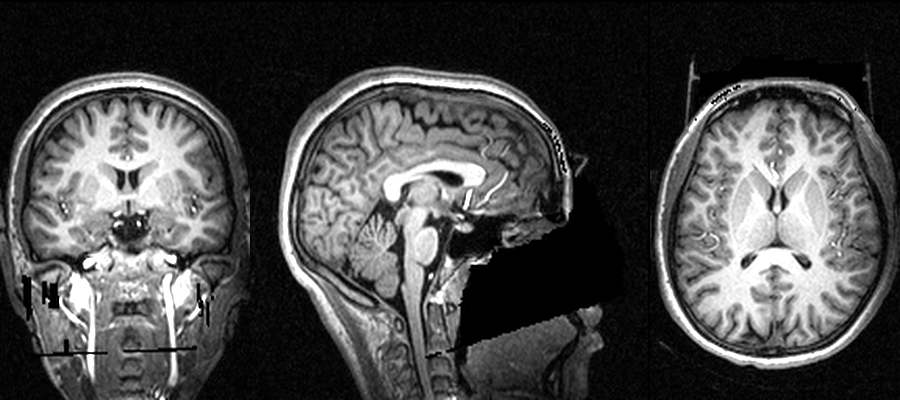

In [21]:
nii.get_image()  # layout='c|s|a' is default

3. Plot all "sub-XY_T1w.nii.gz" files in the ds000001-dataset in one image with filenames

*Reading the [niftiview-README](https://github.com/codingfisch/niftiview) is a good idea!*

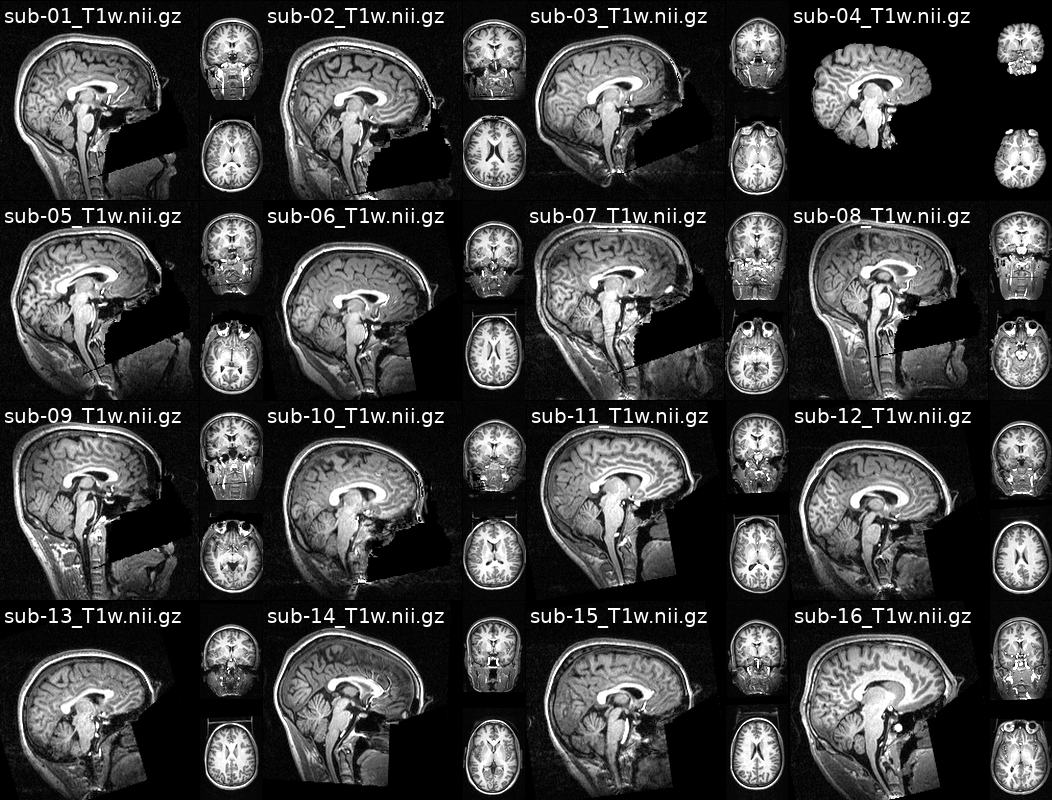

In [26]:
import glob
from niftiview import NiftiImageGrid

filepaths = list(glob.glob('drive/MyDrive/openneuro/ds000001/*/anat/*T1w.nii.gz'))
niigrid = NiftiImageGrid(sorted(filepaths))
niigrid.get_image(height=800, layout='s|c/a', fpath=1)